In [31]:
import numpy as np

unsorted = np.array([2,4,6,8,4,5,2,1,9,0,4,6,7,4,3,2,1,9,10,3,7,9,6,0,1,3,5,6,7,8,9,10,2,3,6,8,9,10,6,7,4,3])
sorted_dict = {}

maximum = 0
for n in unsorted:     # find the maximum value in the unsorted array
    if n > maximum:
        maximum = n
        
minimum = unsorted[0]   # find the minimum value in the unsorted array
for n in unsorted:
    if n < minimum:
        minimum = n
        
num_range = range(minimum, maximum+1)     # set the range of numbers in the array to the dictionary values
for n in num_range:                 
    sorted_dict[n] = 0

for n in unsorted:              # assign frequency to each dictionary value
    for num in num_range:
        if n == num:
            sorted_dict[n] += 1
            
print(sorted_dict)

{0: 2, 1: 3, 2: 4, 3: 5, 4: 5, 5: 2, 6: 6, 7: 4, 8: 3, 9: 5, 10: 3}


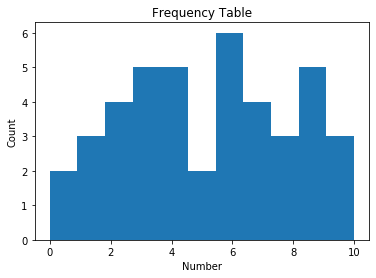

In [37]:
import matplotlib.pyplot as plt

plt.hist(unsorted, 11)
plt.title("Frequency Table")
plt.xlabel("Number")
plt.ylabel("Count")
plt.show()

In [38]:
import json

with open("sorted_dict.json", "w") as outfile:
    json.dump(sorted_dict, outfile)

In [4]:
import pandas as pd
df = pd.read_csv("netflix-data.csv")
df.shape

(200, 10)

In [5]:
df.head()

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,Charlie,3/20/2013 5:17,0:00:05,NaN,Star Trek: Deep Space Nine: Season 5: Empok No...,NaN,Mac,0:00:05,Not latest view,US (United States)
1,Charlie,3/20/2013 4:27,0:44:31,NaN,Star Trek: Deep Space Nine: Season 5: Blaze of...,NaN,Mac,0:44:31,Not latest view,US (United States)
2,Charlie,3/20/2013 4:05,0:22:06,NaN,Star Trek: Deep Space Nine: Season 5: Children...,NaN,Mac,0:44:37,0:44:37,US (United States)
3,Charlie,3/20/2013 0:20,0:48:14,NaN,The Invisible War,NaN,Microsoft Xbox 360,0:53:18,0:53:18,US (United States)
4,Charlie,3/20/2013 0:10,0:04:51,NaN,The Invisible War,NaN,Mac,0:05:01,Not latest view,US (United States)


In [9]:
df = df.drop(['Profile Name', 'Attributes', 'Supplemental Video Type', 'Device Type', 'Latest Bookmark', 'Country'], axis=1)
df.head()

,Start Time,Duration,Title,Bookmark
0,3/20/2013 5:17,0:00:05,Star Trek: Deep Space Nine: Season 5: Empok No...,0:00:05
1,3/20/2013 4:27,0:44:31,Star Trek: Deep Space Nine: Season 5: Blaze of...,0:44:31
2,3/20/2013 4:05,0:22:06,Star Trek: Deep Space Nine: Season 5: Children...,0:44:37
3,3/20/2013 0:20,0:48:14,The Invisible War,0:53:18
4,3/20/2013 0:10,0:04:51,The Invisible War,0:05:01


In [10]:
df['Start Time'] = pd.to_datetime(df['Start Time'], utc=True)
df.dtypes

Start Time    datetime64[ns, UTC]
Duration                   object
Title                      object
Bookmark                   object
dtype: object

In [11]:
df = df.set_index('Start Time')
df.index = df.index.tz_convert('US/Eastern')
df = df.reset_index()
df.head()

,Start Time,Duration,Title,Bookmark
0,2013-03-20 01:17:00-04:00,0:00:05,Star Trek: Deep Space Nine: Season 5: Empok No...,0:00:05
1,2013-03-20 00:27:00-04:00,0:44:31,Star Trek: Deep Space Nine: Season 5: Blaze of...,0:44:31
2,2013-03-20 00:05:00-04:00,0:22:06,Star Trek: Deep Space Nine: Season 5: Children...,0:44:37
3,2013-03-19 20:20:00-04:00,0:48:14,The Invisible War,0:53:18
4,2013-03-19 20:10:00-04:00,0:04:51,The Invisible War,0:05:01


In [12]:
df['Duration'] = pd.to_timedelta(df['Duration'])
df.dtypes

Start Time    datetime64[ns, US/Eastern]
Duration                 timedelta64[ns]
Title                             object
Bookmark                          object
dtype: object

In [14]:
startrek = df[df['Title'].str.contains('Star Trek', regex=False)]
startrek.shape

(43, 4)

In [15]:
startrek = startrek[(startrek['Duration'] > '0 days 00:01:00')]
startrek.shape

(38, 4)

In [16]:
startrek['Duration'].sum()

Timedelta('0 days 20:00:57')

In [17]:
startrek['weekday'] = startrek['Start Time'].dt.weekday
startrek['hour'] = startrek['Start Time'].dt.hour

startrek.head()

,Start Time,Duration,Title,Bookmark,weekday,hour
1,2013-03-20 00:27:00-04:00,00:44:31,Star Trek: Deep Space Nine: Season 5: Blaze of...,0:44:31,2,0
2,2013-03-20 00:05:00-04:00,00:22:06,Star Trek: Deep Space Nine: Season 5: Children...,0:44:37,2,0
5,2013-03-19 18:34:00-04:00,00:22:29,Star Trek: Deep Space Nine: Season 5: Children...,0:22:31,1,18
6,2013-03-19 01:07:00-04:00,00:33:10,Star Trek: Deep Space Nine: Season 5: Soldiers...,0:44:42,1,1
7,2013-03-18 19:57:00-04:00,00:11:36,Star Trek: Deep Space Nine: Season 5: Soldiers...,0:11:36,0,19


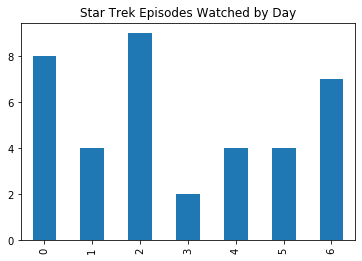

In [39]:
import matplotlib

startrek['weekday'] = pd.Categorical(startrek['weekday'], categories =
                                    [0, 1, 2, 3, 4, 5, 6], ordered=True)
startrek_day = startrek['weekday'].value_counts()
startrek_day = startrek_day.sort_index()

startrek_day.plot(kind='bar', title ='Star Trek Episodes Watched by Day')

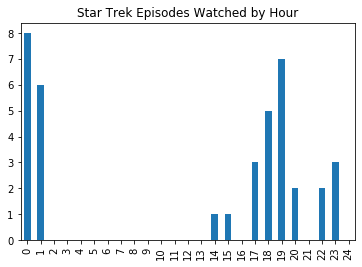

In [40]:
startrek['hour'] = pd.Categorical(startrek['hour'], categories=
        [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24],
        ordered=True)

startrek_hour = startrek['hour'].value_counts()
startrek_hour = startrek_hour.sort_index()

startrek_hour.plot(kind='bar', title ='Star Trek Episodes Watched by Hour')